# Human Resources Data Analysis and Attrition Prediction

_Exploratory Analysis of HR Dataset_

--- 

HR analysis helps us to interpret organizational data. It identifies people-related trends in the data, and enables the HR department to take appropriate action to keep the organization running smoothly and profitably. Attrition in a company is one of the complex challenges faced by human resources managers and HR staff.
Interestingly, machine learning models can be deployed to predict potential cases of attrition, helping HR staff to take the necessary steps to retain the employee.

Before any statistical processing, we need to ensure the quality of our data by (possibly) **cleaning** it - deleting redundant data, formatting strings, deleting NaNs, possibly performing data transformations - and **visualizing** it.

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

## Data Loading

_Note:_ In Python, [colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html) allows easier dataframe visualization.

In [4]:
data = pd.read_csv('HR-Employee-Attrition.csv')

display( data.head().style.background_gradient(cmap='BuPu') )

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


For each employee, we observe the following 35 variables:
* `Age` : Age in years of the employee
* `Attrition` : People who people leave
* `BusinessTravel` : How often an employee embark on a job related travel
* `DailyRate` : Daily rate at which an employee is paid
* `Department` : Department where the employee works
* `DistanceFromHome` : Distance an employee travels from home to work
* `Education` : Level of education of the employee
* `EducationField` : What field the employee studied in school
* `EmployeeCount` : Count of employee
* `EmployeeNumber` : EMployee number
* `EnvironmentSatisfaction` : Employee environment satisfaction
* `Gender` : Gender of the employee
* `HourlyRate` : Hourly rate of pay of the employee
* `JobInvolvement` : Employee job involvement ratings
* `JobLevel` : Employee Job level
* `JobRole` : Employee Job role
* `JobSatisfaction` : Employee Job Staisfaction
* `MaritalStatus` : Employee Marital Status
* `MonthlyIncome` : Employee monthly income
* `MonthlyRate` : Employee Monthly rate
* `NumCompaniesWorked` : Number of companies worked
* `Over18` : Age over 18 years
* `OverTime` : Work overtime
* `PercentSalaryHike` : Salary increment in Percentages
* `PerformanceRating` : Performance rating
* `RelationshipSatisfaction` : Relationship satisfaction
* `StandardHours` : Employee standard hours worked
* `StockOptionLevel` : Stock options level
* `TotalWorkingYears` : Total working hours
* `TrainingTimesLastYear` : Total working years
* `WorkLifeBalance` : Work life balance rating
* `YearsAtCompany` : Years at the company
* `YearsInCurrentRole` : Years in current role
* `YearsSinceLastPromotion` : Years since last promotion
* `YearsWithCurrManager` : Years with current manager

##### <span style="color:purple"> **Question:** How many employees are we looking at? </span>

In [5]:
### TO BE COMPLETED ###

data.shape[0]

1470

## Data Cleaning

##### <span style="color:purple"> **Todo:** Check data quality.</span>

1. Does this dataset contain duplicate rows?
2. How many distinct (unique) values does each variable take?
3. How many empty cells are there in each column?
4. How are the variables encoded? What type?

In [16]:
### TO BE COMPLETED ###


In [6]:
# %load solutions/data_quality.py
print('Number of duplicated lines:', data.duplicated().sum())
print('')

df = pd.DataFrame({
    'Unique':data.nunique(),
    'Null':data.isna().sum(),
    'NullPercent':data.isna().sum() / len(data),
    'Type':data.dtypes.values
})
display(df)

Number of duplicated lines: 0



,Unique,Null,NullPercent,Type
Age,43,0,0.0,int64
Attrition,2,0,0.0,object
BusinessTravel,3,0,0.0,object
DailyRate,886,0,0.0,int64
Department,3,0,0.0,object
DistanceFromHome,29,0,0.0,int64
Education,5,0,0.0,int64
EducationField,6,0,0.0,object
EmployeeCount,1,0,0.0,int64
EmployeeNumber,1470,0,0.0,int64


> Comments.

##### <span style="color:purple"> **Todo:** Remove unnecessary columns.</span>

Dropping columns that have:
- Only _one_ inside it that doesn't contribute to the analysis
- Columns that contain _index_ value

Use pandas [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function.

In [ ]:
### TO BE COMPLETED ###

[...]

In [7]:
# %load solutions/data_drop.py
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
display( data.head().style.background_gradient(cmap='BuPu') )

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


Consider two dataframes, `num` and `cat`, containing _quantitative_ and _qualitative_ data respectively.

In [8]:
num = data.select_dtypes(exclude='O')
display(num.head())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [9]:
cat = data.select_dtypes(include='O')
display(cat.head())

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


##### <span style="color:purple"> **Question:**  What is the proportion of qualitative data in this dataset? Of quantitative data?</span>

In [ ]:
### TO BE COMPLETED ###

[...]

In [10]:
# %load solutions/data_proportion.py
print('Quantitative data:', round(100*num.shape[1]/data.shape[1],2), '%')
print('Qualitative data:', round(100*cat.shape[1]/data.shape[1],2), '%')

Quantitative data: 74.19 %
Qualitative data: 25.81 %


##### <span style="color:purple"> **Todo:** For each variable, display its basic statistical descriptors: variable, mean, quantiles, _etc._</span>

In [ ]:
### TO BE COMPLETED ###

[...]

In [11]:
# %load solutions/stat_summary.py
# print( data.describe().T )
display( data.describe().T.style.background_gradient(cmap='BuPu') )

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.000000,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000
JobSatisfaction,1470.000000,2.728571,1.102846,1.000000,2.000000,3.000000,4.000000,4.000000
MonthlyIncome,1470.000000,6502.931293,4707.956783,1009.000000,2911.000000,4919.000000,8379.000000,19999.000000


## Correlation Analysis

##### <span style="color:purple"> **Todo:** Assess the correlation between variables.</span>

1. Plot the Correlation Matrix between variables,
2. You can select columns with high correlation:

In [ ]:
### TO BE COMPLETED ###

[...]

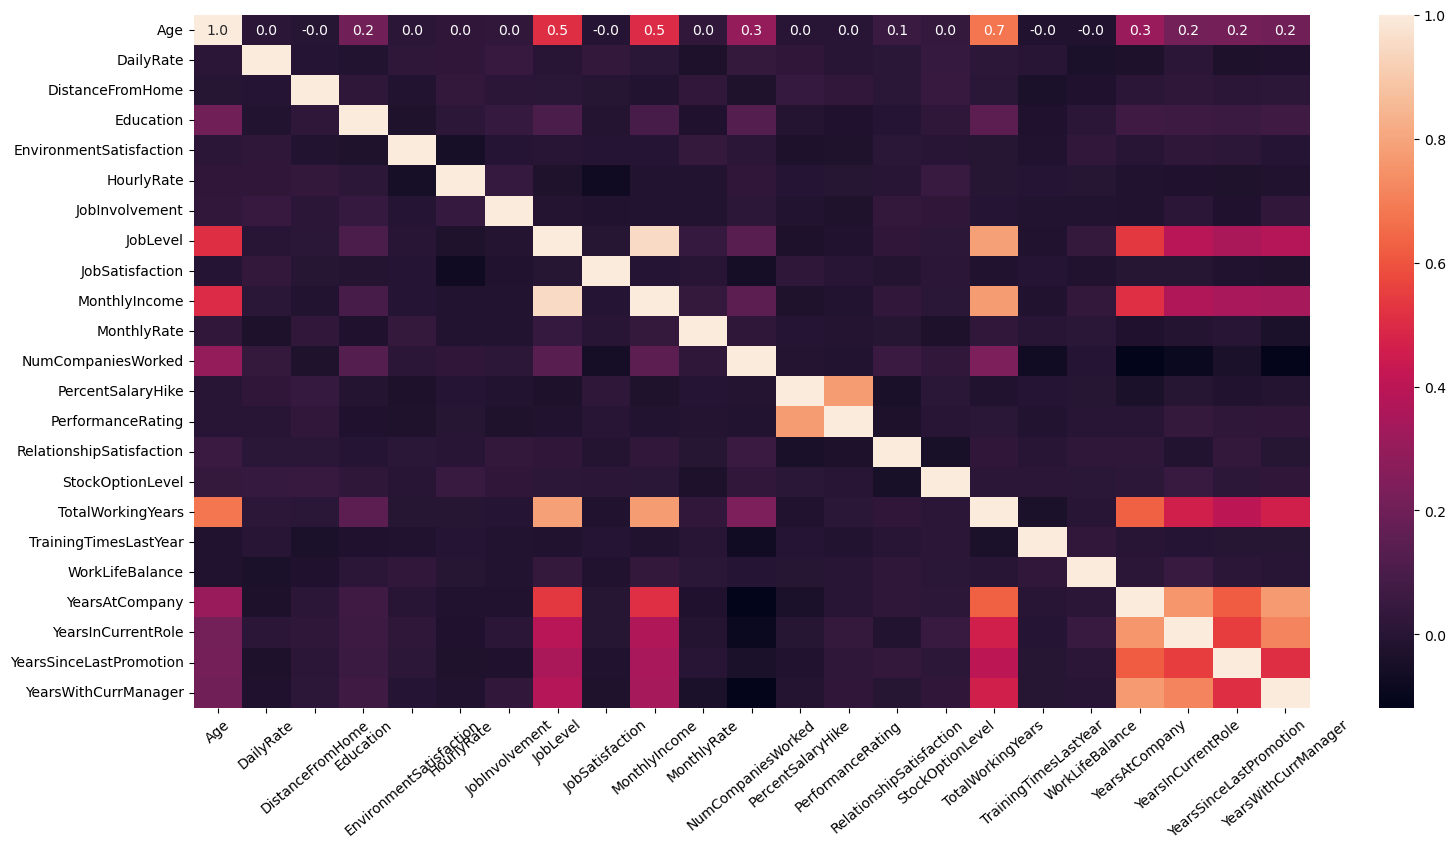

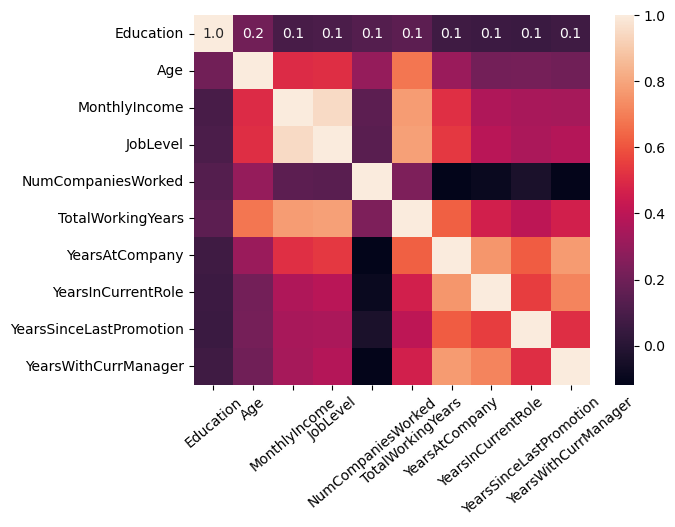

In [13]:
# %load solutions/data_correlation.py
plt.figure(figsize=(18,9))

# correlation between columns
sns.heatmap(num.corr(), annot=True, fmt='.1f')
plt.xticks(rotation=40)

plt.show()

# --- #

# strong correlation between columns
cols = ['Education','Age','MonthlyIncome','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
sns.heatmap(data[cols].corr(), annot=True, fmt='.1f')
plt.xticks(rotation=40)
plt.show()

##### <span style="color:purple"> **Todo:** Draw a pairplot for the 5 highest correlation variable.</span>

Color the observations according to their attribution.

In [ ]:
### TO BE COMPLETED ###

[...]

c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

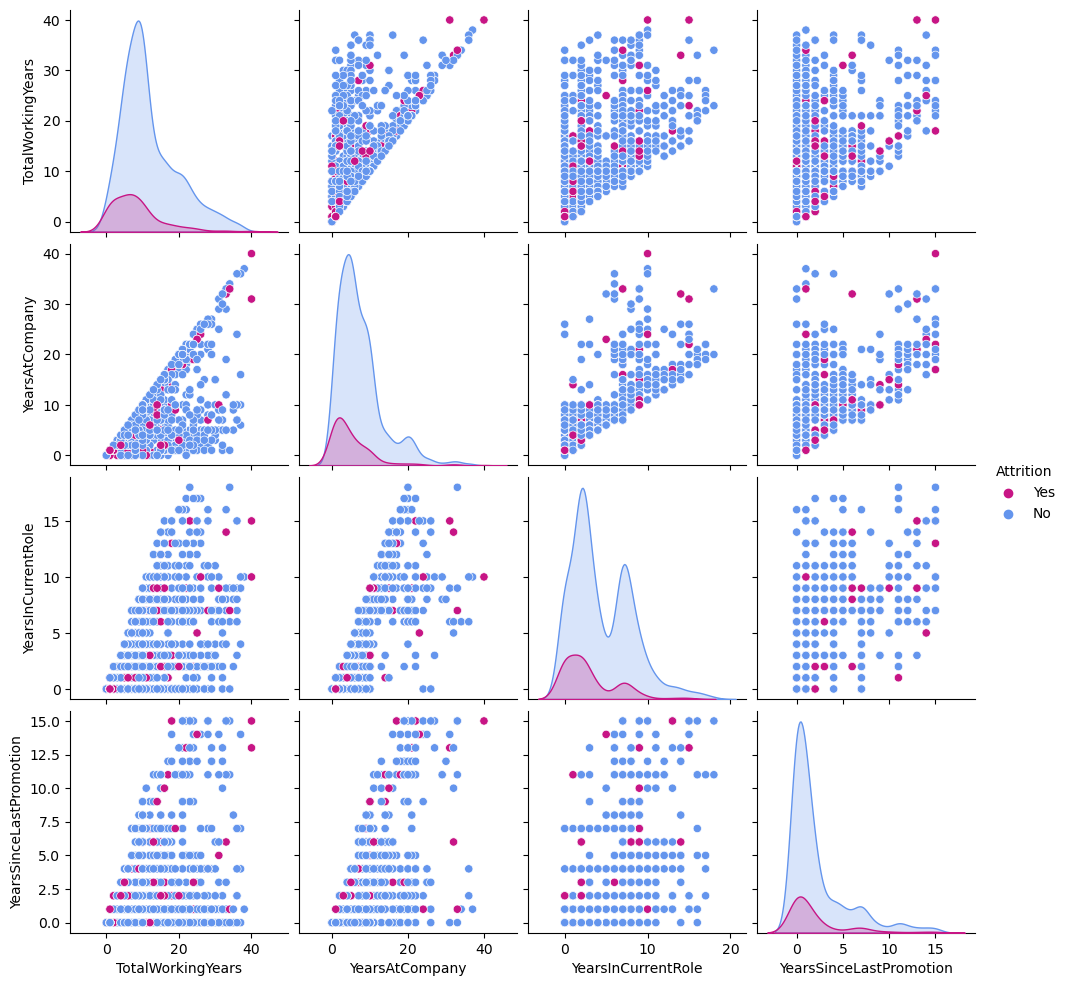

In [15]:
# %load solutions/data_pairplot.py
cols = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']

sns.pairplot(data[cols], hue = 'Attrition', palette={'Yes': 'mediumvioletred', 'No': 'cornflowerblue'})
plt.show()

According to the figure above, attrition appears to be strongly correlated with employees' career history. 

##### <span style="color:purple"> **Todo:** Represent attrition according to the worker's historical profile.</span>

- Plot the total number of years worked as a function of (i) the number of years spent in this company, (ii) the number of years spent in the current position and, finally, (iii) the number of years since the last promotion. 
- Colour the dots according to attrition.

In [ ]:
### TO BE COMPLETED ###

[...]

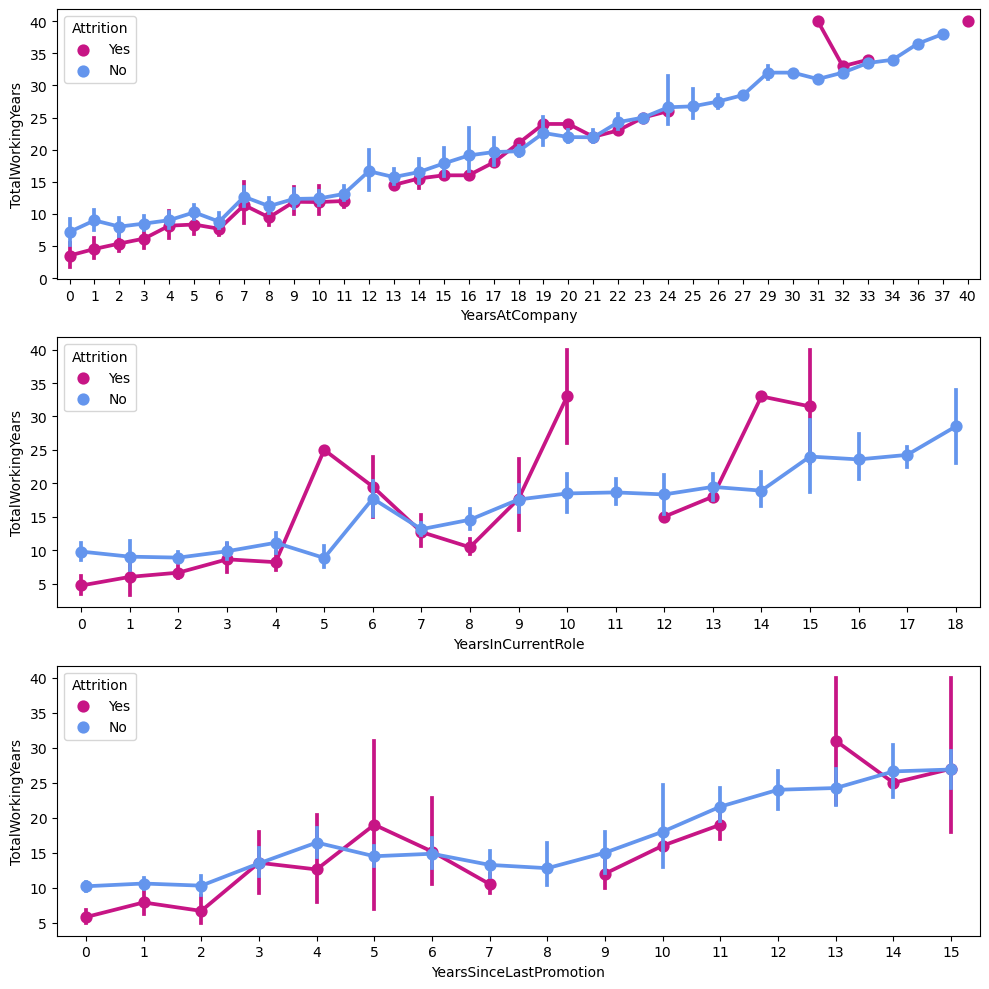

In [17]:
# %load solutions/history.py
cols = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

for i,c in enumerate(cols):
    sns.pointplot(x=data[c], y=data['TotalWorkingYears'], ax=axes[i], hue=data['Attrition'], palette={'Yes':'mediumvioletred', 'No':'cornflowerblue'})
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('TotalWorkingYears')

plt.tight_layout()
plt.show()

> Comments.

## Data Visualization¶

### Breakdown of Overtime Work

##### <span style="color:purple"> **Question:** What is the profile of employees working overtime?</span>

View the distribution of overtime hours worked according to, for example, employees' marital status, department of practice, gender or age.

You can use the [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function.

In [ ]:
### TO BE COMPLETED ###

[...]

c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

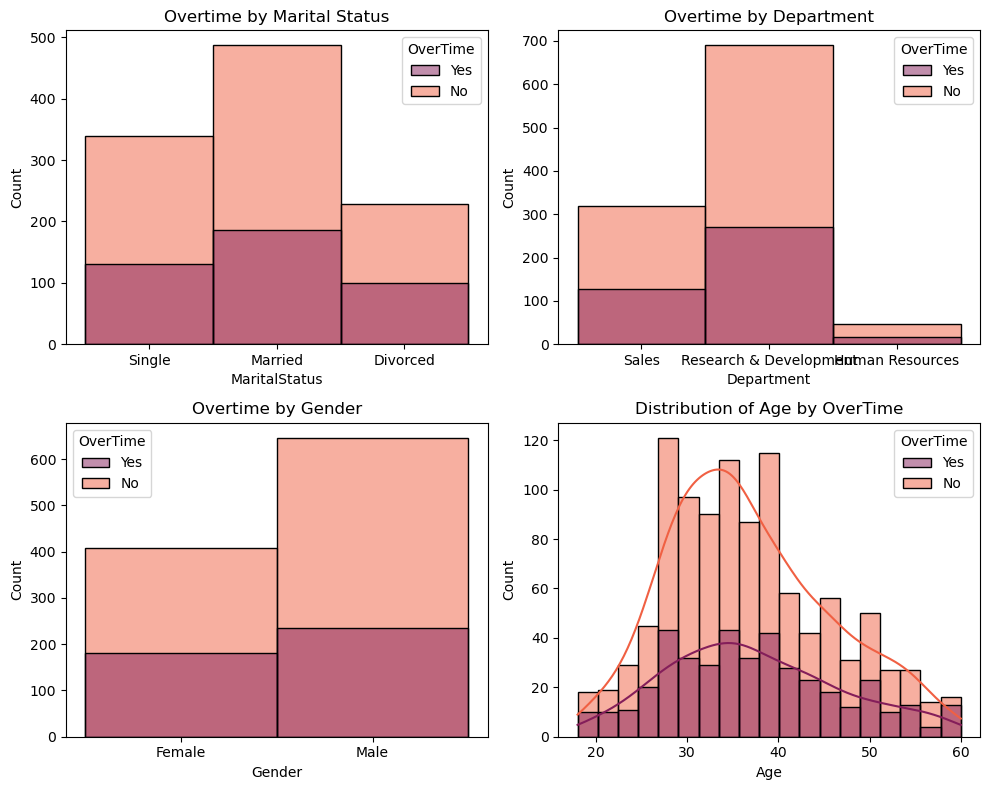

In [19]:
# %load solutions/overtime.py
plt.figure(figsize=(10,8))

# --- #

plt.subplot(2,2,1)
sns.histplot(data, x="MaritalStatus", hue="OverTime", palette="rocket")
plt.title('Overtime by Marital Status')

# --- #

plt.subplot(2,2,2)
sns.histplot(data, x="Department", hue="OverTime", palette="rocket")
# plt.xticks(rotation=35)
plt.title('Overtime by Department')

# --- #

plt.subplot(2,2,3)
sns.histplot(data, x="Gender", hue="OverTime", palette="rocket")
plt.title('Overtime by Gender')

# --- #

plt.subplot(2,2,4)
sns.histplot(data, x='Age', hue='OverTime', palette="rocket", kde=True)
plt.title('Distribution of Age by OverTime')

plt.tight_layout()
plt.show()

> Comments.

## Company Departure

##### <span style="color:purple"> **Question:** What is the profile of employees working overtime?</span>

Carry out the same exploratory study, but distinguish between employees who leave the company (attrition) and those who do not.

In [ ]:
### TO BE COMPLETED ###

[...]

c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\OS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

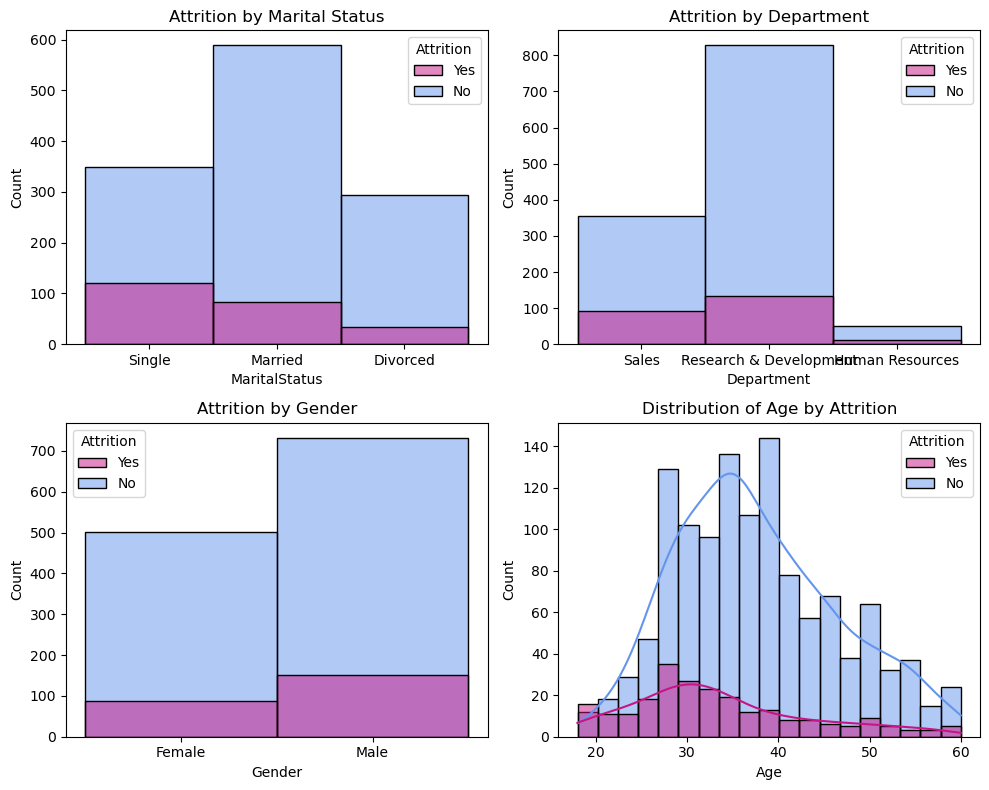

In [25]:
# %load solutions/attrition.py
plt.figure(figsize=(10,8))

# --- #

plt.subplot(2,2,1)
sns.histplot(data, x="MaritalStatus", hue="Attrition", palette={'Yes':'mediumvioletred', 'No':'cornflowerblue'})
plt.title('Attrition by Marital Status')

# --- #

plt.subplot(2,2,2)
sns.histplot(data, x="Department", hue="Attrition", palette={'Yes':'mediumvioletred', 'No':'cornflowerblue'})
# plt.xticks(rotation=35)
plt.title('Attrition by Department')

# --- #

plt.subplot(2,2,3)
sns.histplot(data, x="Gender", hue="Attrition", palette={'Yes':'mediumvioletred', 'No':'cornflowerblue'})
plt.title('Attrition by Gender')

# --- #

plt.subplot(2,2,4)
sns.histplot(data, x='Age', hue='Attrition', palette={'Yes':'mediumvioletred', 'No':'cornflowerblue'}, kde=True)
plt.title('Distribution of Age by Attrition')

plt.tight_layout()
plt.show()

> Comments.

## One-hot Encoding of Categorical Data

To facilitate statistical analysis (LDA decomposition), we will "translate" the various categorical variables into [one-hot](https://fr.wikipedia.org/wiki/Encodage_one-hot) encoder form.

### Attrition

In [26]:
data.loc[data['Attrition']=='No','Attrition'] = 0
data.loc[data['Attrition']=='Yes','Attrition'] = 1

data['Attrition'] = data['Attrition'].astype('int')

### Business Travel

In [27]:
BT = data['BusinessTravel'].unique()

for travel in BT:
    data['Business_'+travel] = 0
    data.loc[data['BusinessTravel']==travel,'Business_'+travel] = 1
    data['Business_'+travel] = data['Business_'+travel].astype('int')

data = data.drop('BusinessTravel',axis=1)
# data.head()

### Working Department

In [28]:
DPT = data['Department'].unique()
DPT_names = ['Sales', 'R & D', 'Dpt HR']

for i, dpt in enumerate(DPT):
    data[DPT_names[i]] = 0
    data.loc[data['Department']==dpt, DPT_names[i]] = 1
    data[DPT_names[i]] = data[DPT_names[i]].astype('int')

data = data.drop('Department',axis=1)
# data.head()

### Education Field

In [29]:
EDUC = data['EducationField'].unique()
EDUC_names = ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Educ HR']

for i, educ in enumerate(EDUC):
    data[EDUC_names[i]] = 0
    data.loc[data['EducationField']==educ, EDUC_names[i]] = 1
    data[EDUC_names[i]] = data[EDUC_names[i]].astype('int')

data = data.drop('EducationField',axis=1)
# data.head()

### Gender

In [30]:
data.loc[data['Gender']=='Male','Gender'] = 1
data.loc[data['Gender']=='Female','Gender'] = 0

data['Gender'] = data['Gender'].astype('int')

### Job Role

In [31]:
JOB = data['JobRole'].unique()
JOB_names = JOB
JOB_names[-1] = 'Job HR'

for i, job in enumerate(JOB):
    data[JOB_names[i]] = 0
    data.loc[data['JobRole']==job, JOB_names[i]] = 1
    data[JOB_names[i]] = data[JOB_names[i]].astype('int')

data = data.drop('JobRole',axis=1)
# data.head()

### MaritalStatus

In [32]:
STATUS = data['MaritalStatus'].unique()
STATUS_names = STATUS

for i, statues in enumerate(STATUS):
    data[STATUS_names[i]] = 0
    data.loc[data['MaritalStatus']==statues, STATUS_names[i]] = 1
    data[STATUS_names[i]] = data[STATUS_names[i]].astype('int')

data = data.drop('MaritalStatus',axis=1)
# data.head()

### OverTime

In [33]:
data.loc[data['OverTime']=='No','OverTime'] = 0
data.loc[data['OverTime']=='Yes','OverTime'] = 1

data['OverTime'] = data['OverTime'].astype('int')

We check:

In [34]:
data.dtypes

Age                           int64
Attrition                     int32
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Business_Travel_Rarely        int32
Business_Travel_Frequently  

## Prediction of Attrition by **Logistic Regression**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

##### <span style="color:purple"> **Todo:** Using the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, define a training and test data set.</span>

In [ ]:
### TO BE COMPLETED ###

[...]

train_x, test_x, train_y, test_y = ...

In [37]:
# %load solutions/train_test_split.py
X = data.drop(['Attrition'],axis=1)
Y = data['Attrition']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=20)

##### <span style="color:purple"> **Todo:** Implement attrition prediction using a logistic regression model.</span>

In [ ]:
### TO BE COMPLETED ###

clf = LogisticRegression(solver='newton-cholesky')
clf.fit(...)

[...]

accuracy = ...

print( classification_report( ... ) )

In [39]:
# %load solutions/logistic_regression.py
clf = LogisticRegression(solver='newton-cholesky')
clf.fit(train_x, train_y)

# --- #

pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
print('Accuray:',round(100*accuracy,2), '%')
print(' ')

# --- #

print(classification_report(test_y, pred_y))

Accuray: 88.89 %
 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       371
           1       0.73      0.47      0.57        70

    accuracy                           0.89       441
   macro avg       0.82      0.72      0.76       441
weighted avg       0.88      0.89      0.88       441



> Comments

## Prediction of Attrition by **Linear Discriminant Analysis** (LDA)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

##### <span style="color:purple"> **Todo:** Implement attrition prediction using LDA decomposition.</span>

In [41]:
### TO BE COMPLETED ###

[...]

[Ellipsis]

In [42]:
# %load solutions/linear_discriminant_analysis.py
clf = LinearDiscriminantAnalysis()
clf.fit(train_x, train_y)

# --- #

pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
print('Accuray:',round(100*accuracy,2), '%')
print(' ')

# --- #

print(classification_report(test_y, pred_y))

Accuray: 88.21 %
 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.70      0.46      0.55        70

    accuracy                           0.88       441
   macro avg       0.80      0.71      0.74       441
weighted avg       0.87      0.88      0.87       441



> Comments.

## Prediction of Attrition by **Quadratic Discriminant Analysis** (QDA)

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

##### <span style="color:purple"> **Todo:** Implement attrition prediction using QDA decomposition.</span>

In [44]:
### TO BE COMPLETED ###

[...]

[Ellipsis]

In [45]:
# %load solutions/quadratic_discriminant_analysis.py
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_x, train_y)

# --- #

pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
print('Accuray:',round(100*accuracy,2), '%')
print(' ')

# --- #

print(classification_report(test_y, pred_y))

Accuray: 33.33 %
 
              precision    recall  f1-score   support

           0       0.93      0.22      0.36       371
           1       0.18      0.91      0.30        70

    accuracy                           0.33       441
   macro avg       0.56      0.57      0.33       441
weighted avg       0.81      0.33      0.35       441



c:\Users\OS\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


> Comments.